In [ ]:
!pip install numpy

In [1]:
import numpy as np
import itertools
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
class HiddenMarkovModel:
    def __init__(self, states, observations, transition_matrix, emission_matrix):
        self.states = states
        self.transition_matrix = transition_matrix
        self.emission_matrix = emission_matrix   
        self.observations = observations

    def pick_observation(self, state):
        return np.random.choice(self.observations, 1,  p = self.emission_matrix[state])[0]

    def get_samples(self):
        cur_state = np.random.choice(self.states, 1)[0]
        yield self.pick_observation(cur_state)
        while True:
            next_state_dist = self.transition_matrix[cur_state]
            cur_state = np.random.choice(self.states, 1,  p = next_state_dist)[0]
            yield self.pick_observation(cur_state)


In [3]:
# transition_matrix = np.array([
#     [0.75, 0.25, 0, 0, 0],
#     [0.25, 0.50, 0.25, 0, 0],
#     [0, 0.25, 0.50, 0.25, 0],
#     [0, 0, 0.25, 0.50, 0.25],
#     [0, 0, 0, 0.25, 0.75],
# ])

def build_transistion_matrix_for_uniform_dist(n):
    transition_matrix = np.zeros((n,n))
    for ii in range(n):
        transition_matrix[ii,ii] = 0.5
        
    for ii in range(1, n):
        transition_matrix[ii,ii-1] = 0.25
        
    for ii in range(n-1):
        transition_matrix[ii,ii+1] = 0.25
        
    transition_matrix[0,0] = transition_matrix[-1,-1] = 0.75
    return transition_matrix


n_states = 16
transition_matrix = build_transistion_matrix_for_uniform_dist(n_states)

#print(transition_matrix)
states = np.arange(n_states)
emission_matrix = np.eye(n_states)
observations = np.arange(1, n_states+1)

In [4]:
hmm = HiddenMarkovModel(states = states, 
                        observations=observations,
                        transition_matrix=transition_matrix, 
                        emission_matrix=emission_matrix)

In [5]:
def plot_samples(hmm, check_points):
    check_points = sorted(check_points)
    cur_ck = 0
    samples = []
    for count, sample in enumerate(itertools.islice(hmm.get_samples(), check_points[-1]+1)):
        samples.append(sample)
        if count == check_points[cur_ck]:
            cc = Counter(samples)
            counts = list(cc.values())
            values = list(cc.keys())

            plt.bar(values, counts)
            plt.xlabel('Sample')
            plt.ylabel('Count')
            plt.title(f'Sample Distribution after {count} samples')
            plt.show()
            cur_ck += 1
 

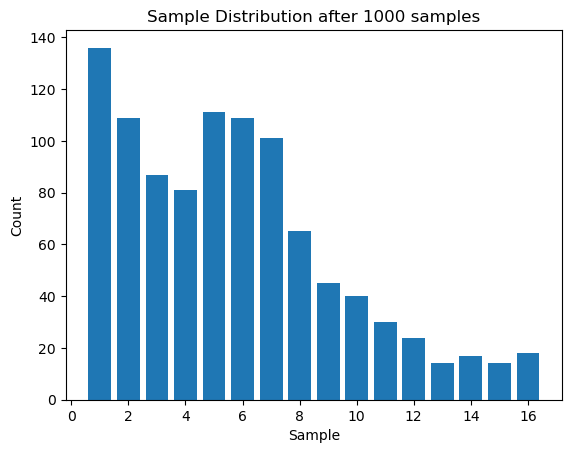

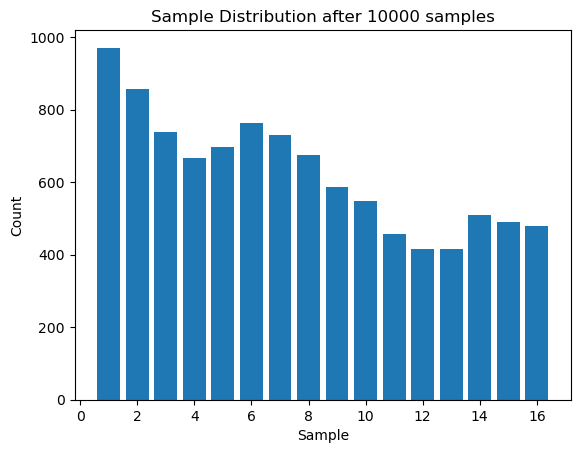

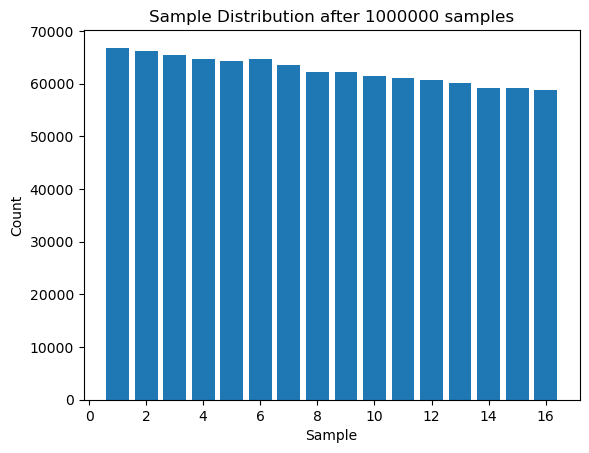

In [84]:
plot_samples(hmm, [1000, 10000, 1000000])